<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/3_data_visualization/2_data_visualization_with_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Data Visualization with Seaborn

Seaborn is a fantastic and easy to use Python Visualization which is built on Matplotlib. 

For a quick look, check out the [gallery page](https://seaborn.pydata.org/examples/index.html).

To be covered:
* [1. Relational Plots:](#1)
    * [Scatter plots](#1-1)
    * [Line plots](#1-2)


* [2. Distribution Plots:](#2)
    * [Plotting Histograms with displot() and histplot()](#2-1)
    * [Plotting Bivariate Data with Jointplot()](#2-2)
    * [Plotting Many Distribution with pairplot()](#2-3)
    * [Plotting Distributions with rugplot()](#2-3)
    * [Kernel Density Estimation (KDE) Plot with kdeplot() and displot()](#2-4)
    * [Cumulative Distributions](#2-5)
    
* [3. Categorical Plots:](#3)
    * [Categorical estimate plots](#3-1)
    * [Categorical distribution plots](#3-2)
    * [Categorical scatter plots](#3-3)
    * [Plotting multiple categorical plots](#3-4)
    
* [4. Regression Plots](#4)

* [5. Multiplots:](#5)
  * [Facet grids](#5-1)
  * [Pair grids](#5-2)
  * [Pair plots](#5-3)
        
* [6. Matrix Plots: Heat and Cluster Maps](#6)
  * [Heat maps](#6-1)
  * [Cluster maps](#6-2)
  
* [7. Style and Color](#7)
  * [Styles and themes](#7-1)
  * [Colors](#7-2)

In this lab, we will use real world datasets, which are already part of Seaborn. 

<a name='1'></a>

## 1. Relational Plots

These kind of plots are used to analyze the relationship between features. 

* Scatter Plots
* Line Plots

#### Imports


In [166]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
# Loading the datasets to be used in this lab

titanic = sns.load_dataset('titanic')
fmri = sns.load_dataset('fmri')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [168]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [169]:
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


In [170]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [171]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


<a name='1-1'></a>
### Scatter Plots

In order to visualize the relationship between between two numeric features, scatter plot can be a go to plot over other types. 

We will use `sns.scatterplot(data, x, y, hue, style, palette, size, sizes, legend, markers...)` and also `sns.relplot()`.

<AxesSubplot:xlabel='age', ylabel='fare'>

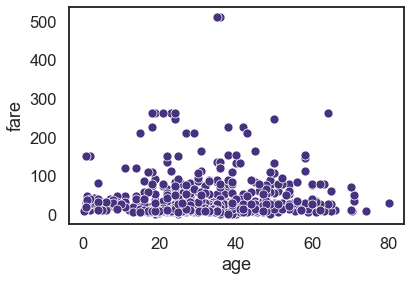

In [172]:
sns.scatterplot(data=titanic, x='age', y='fare')

With `hue` parameter, we can map another feature to the plot. 

<AxesSubplot:xlabel='age', ylabel='fare'>

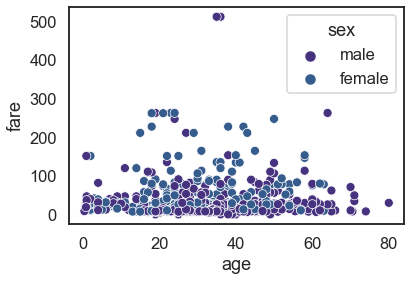

In [173]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

You can see it makes the plots more clear. In terms of this titanic dataset, you can directly identify that women paid high fare than men. 

To also highlight the difference between the `hue classes`, we can add marker style as follows.

<AxesSubplot:xlabel='age', ylabel='fare'>

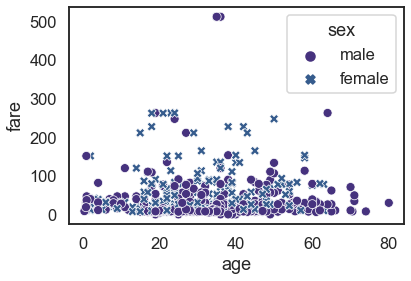

In [174]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='sex')

Increasing the figure size...

<AxesSubplot:xlabel='age', ylabel='fare'>

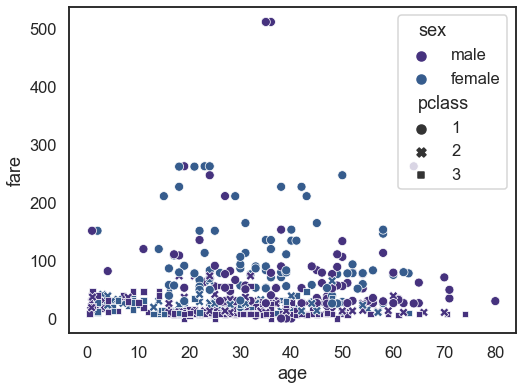

In [175]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass')

You can also use specific markers with `style` and `markers` paremeters. 

<AxesSubplot:xlabel='age', ylabel='fare'>

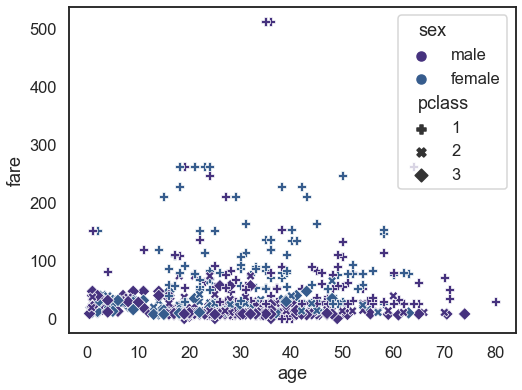

In [176]:
plt.figure(figsize=(8,6))

markers = {1:'P', 2:'X', 3:'D'} # P, X, and D are markers
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass', markers=markers)

Adding same feature on `hue` to `size` will make the plot more meaninfgul. `sizes` will control the range of marker areas of `size`. The 

<AxesSubplot:xlabel='age', ylabel='fare'>

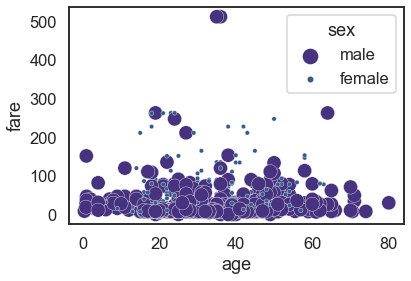

In [177]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', size='sex', sizes=(20,200))

<AxesSubplot:xlabel='age', ylabel='fare'>

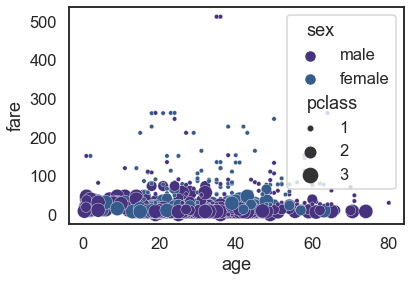

In [178]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', size='pclass', sizes=(20,200))

<a name='1-2'></a>
### Line Plots

Line plots are used to analyze the changes in one variable with respect to other variable such as time. An example, say you want to see the daily changes in revenues everyday. 

Data visualization is an art. We will see more visualization types but always, there is no viz type that is going to be fit all. It is always good to consider the audience and the goal of the analysis.


To make line plot in Seaborn, we will use `sns.relplot()`, the kind parameter being `line`. You can make a scatter plots by changing the `kind` to `scatter`.

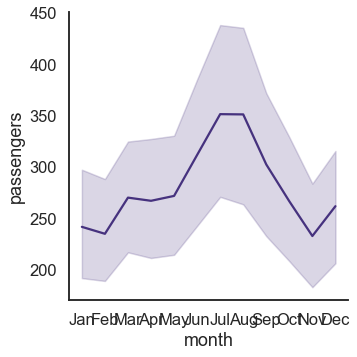

In [179]:
sns.relplot(data=flights, x='month', y='passengers', kind='line')

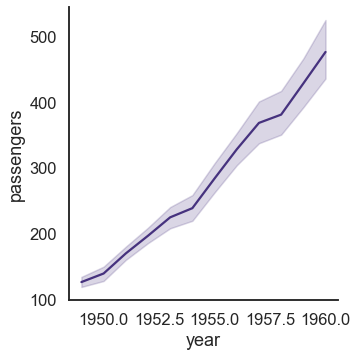

In [180]:
sns.relplot(data=flights, x='year', y='passengers', kind='line')

You can remove the confidence intervals by setting parameter `ci=None`. Setting `ci=sd` will instead show standard deviation and that can be useful sometime.

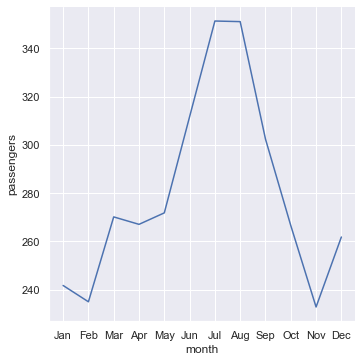

In [181]:
sns.set_theme(style="darkgrid") #setting the grid for all next plots

sns.relplot(data=flights, x='month', y='passengers', ci=None, kind='line')

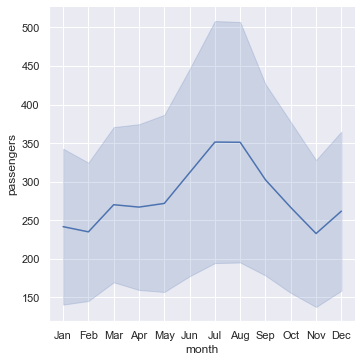

In [182]:
sns.relplot(data=flights, x='month', y='passengers', ci='sd', kind='line')

By default, `relplot` will aggregate the values on y axis in accordance to x axis. You can get rid of it by settng `estimator=None`.

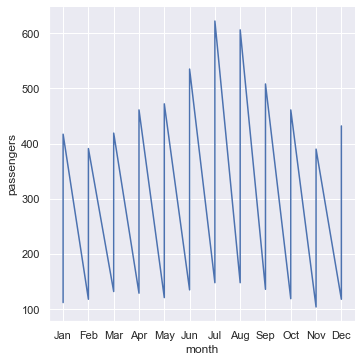

In [183]:
sns.relplot(data=flights, x='month', y='passengers', ci=None, estimator=None, kind='line')

You can add multiple lines....

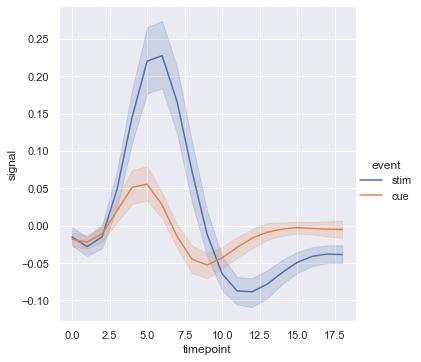

In [184]:
sns.relplot(data=fmri, x='timepoint', y='signal', 
            hue='event', kind='line')

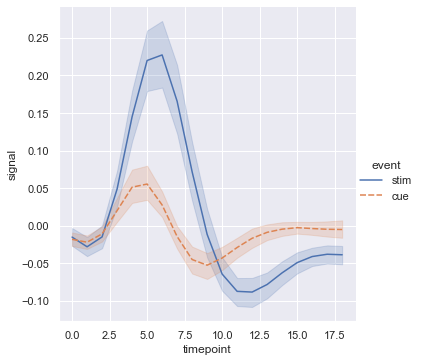

In [185]:
sns.relplot(data=fmri, x='timepoint', y='signal', 
            hue='event', kind='line', style='event')

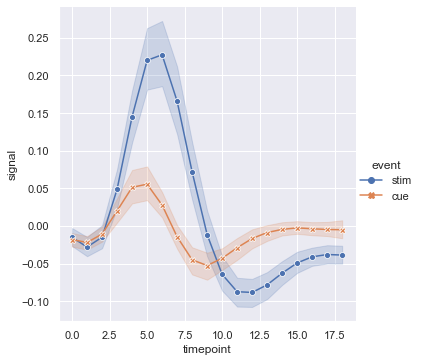

In [186]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line', 
            style='event', dashes=False, markers=True)

Showing multiple relationships

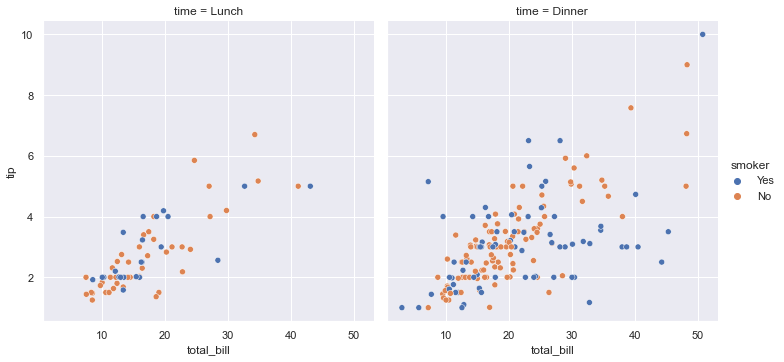

In [187]:
sns.relplot(x='total_bill', y='tip', hue='smoker',
            col='time', data=tips);

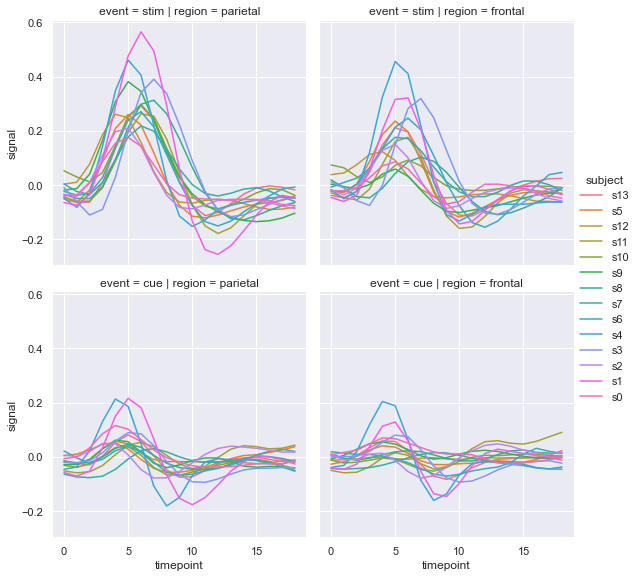

In [188]:
sns.relplot(x='timepoint', y='signal', hue='subject',
           col='region', row='event', height=4,
           kind='line', estimator=None, data=fmri)

<a name='2'></a>
## 2. Distribution Plots

These kind of plots are used to visualize the distribution of the features. Understanding how your data is distributed can help you to determine the range of values, their central tendency, or if they maybe inclined in one direction and also spotting outliers. 

Distribution plots functions:
* displot()
* jointplot()
* pairplot()
* rugplot()
* kdeplot

<a name='2-1'></a>
### Plotting Histograms with displot() and histplot()

Histogram is a bar plot whose x-axis is a variable or a feature and y-axis being the count of values of that particular variable. By default, displot() plots the histogram.

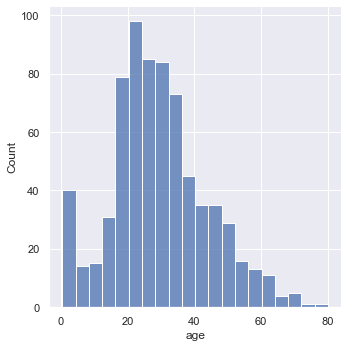

In [189]:
sns.displot(titanic['age'])

By default, Kernel Density Estimator(KDE) is True. By setting it off, we should remain with the histograms. A histogram displays data by grouping data into `bins`. We can set the `bins` to a value of choice.

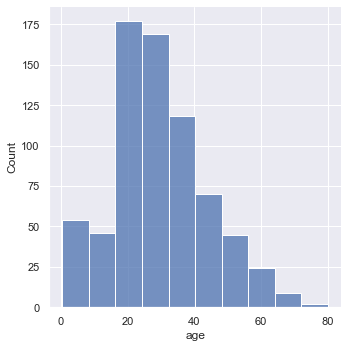

In [190]:
sns.displot(titanic['age'], kde=False, bins=10)

We can also plot categorical data on histograms.

<AxesSubplot:xlabel='day', ylabel='Count'>

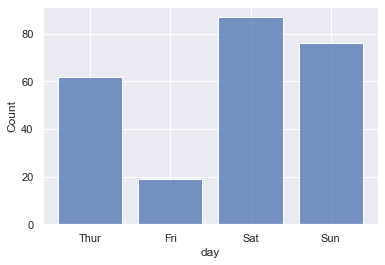

In [191]:
sns.histplot(tips, x='day', shrink=.8)

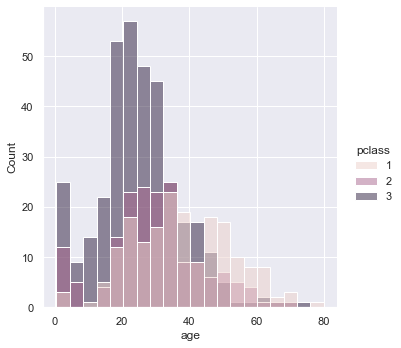

In [192]:
sns.displot(titanic, x='age',hue='pclass')

<AxesSubplot:xlabel='age', ylabel='Count'>

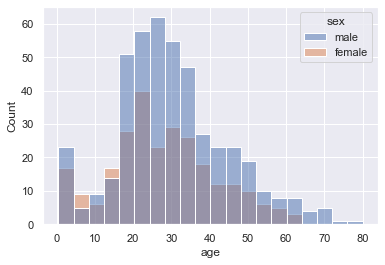

In [193]:
sns.histplot(titanic, x="age",hue="sex")

<AxesSubplot:xlabel='age', ylabel='Count'>

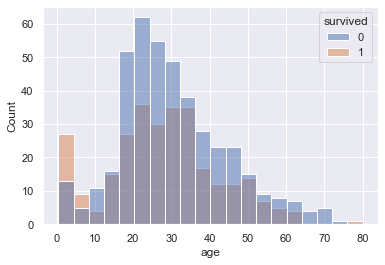

In [194]:
sns.histplot(titanic, x="age",hue="survived")

We can also make stacked bars by setting the parameter `multiple='stack'`.

<AxesSubplot:xlabel='age', ylabel='Count'>

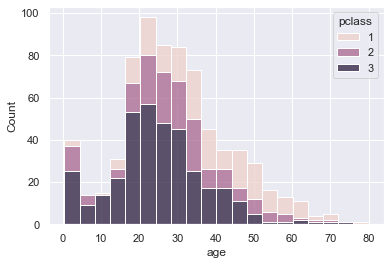

In [195]:
sns.histplot(titanic, x='age',hue='pclass', multiple='stack')

<a name='2-2'></a>
### Plotting Bivariate Data with Jointplot()

We use jointplot() to plot two variables with bivariate and univariate graphs. We can have the following options in `kind`: `scatter, reg, resid, kde, hex`. The default `kind` is `scatter`.

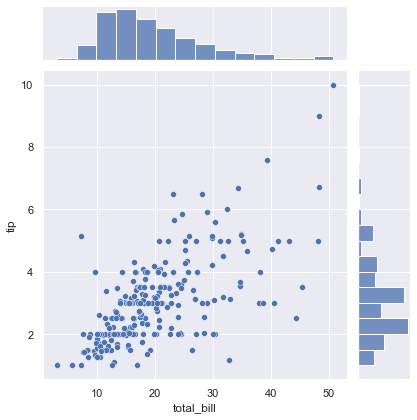

In [196]:
sns.jointplot(data=tips, x='total_bill', y='tip')

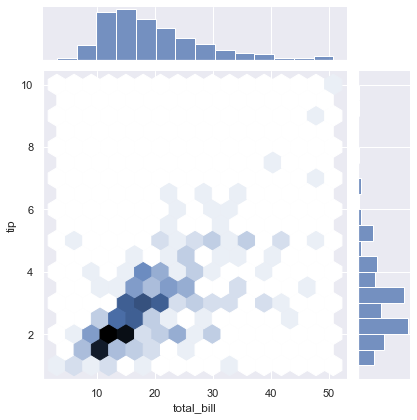

In [197]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')

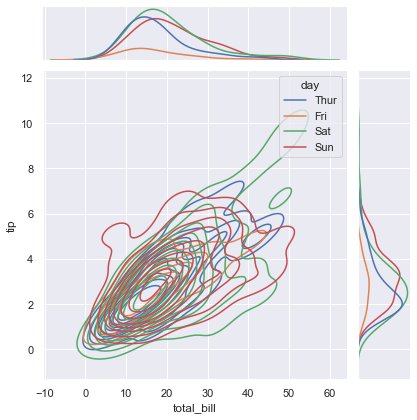

In [198]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', hue='day')

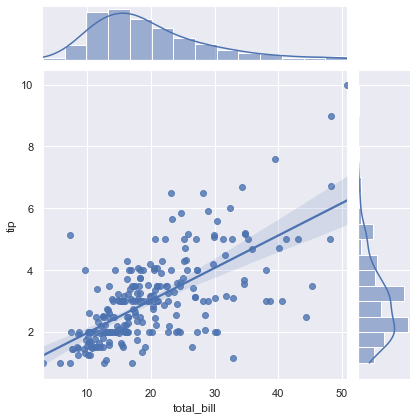

In [199]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

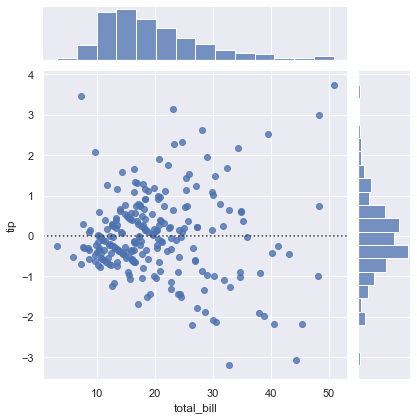

In [200]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='resid')

<a name='2-3'></a>
### Plotting Many Distribution with pairplot()

pairplot() visualize all possible distributions of variables in datasets. This is a cool plot, you can immmediately see relationships between features.

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


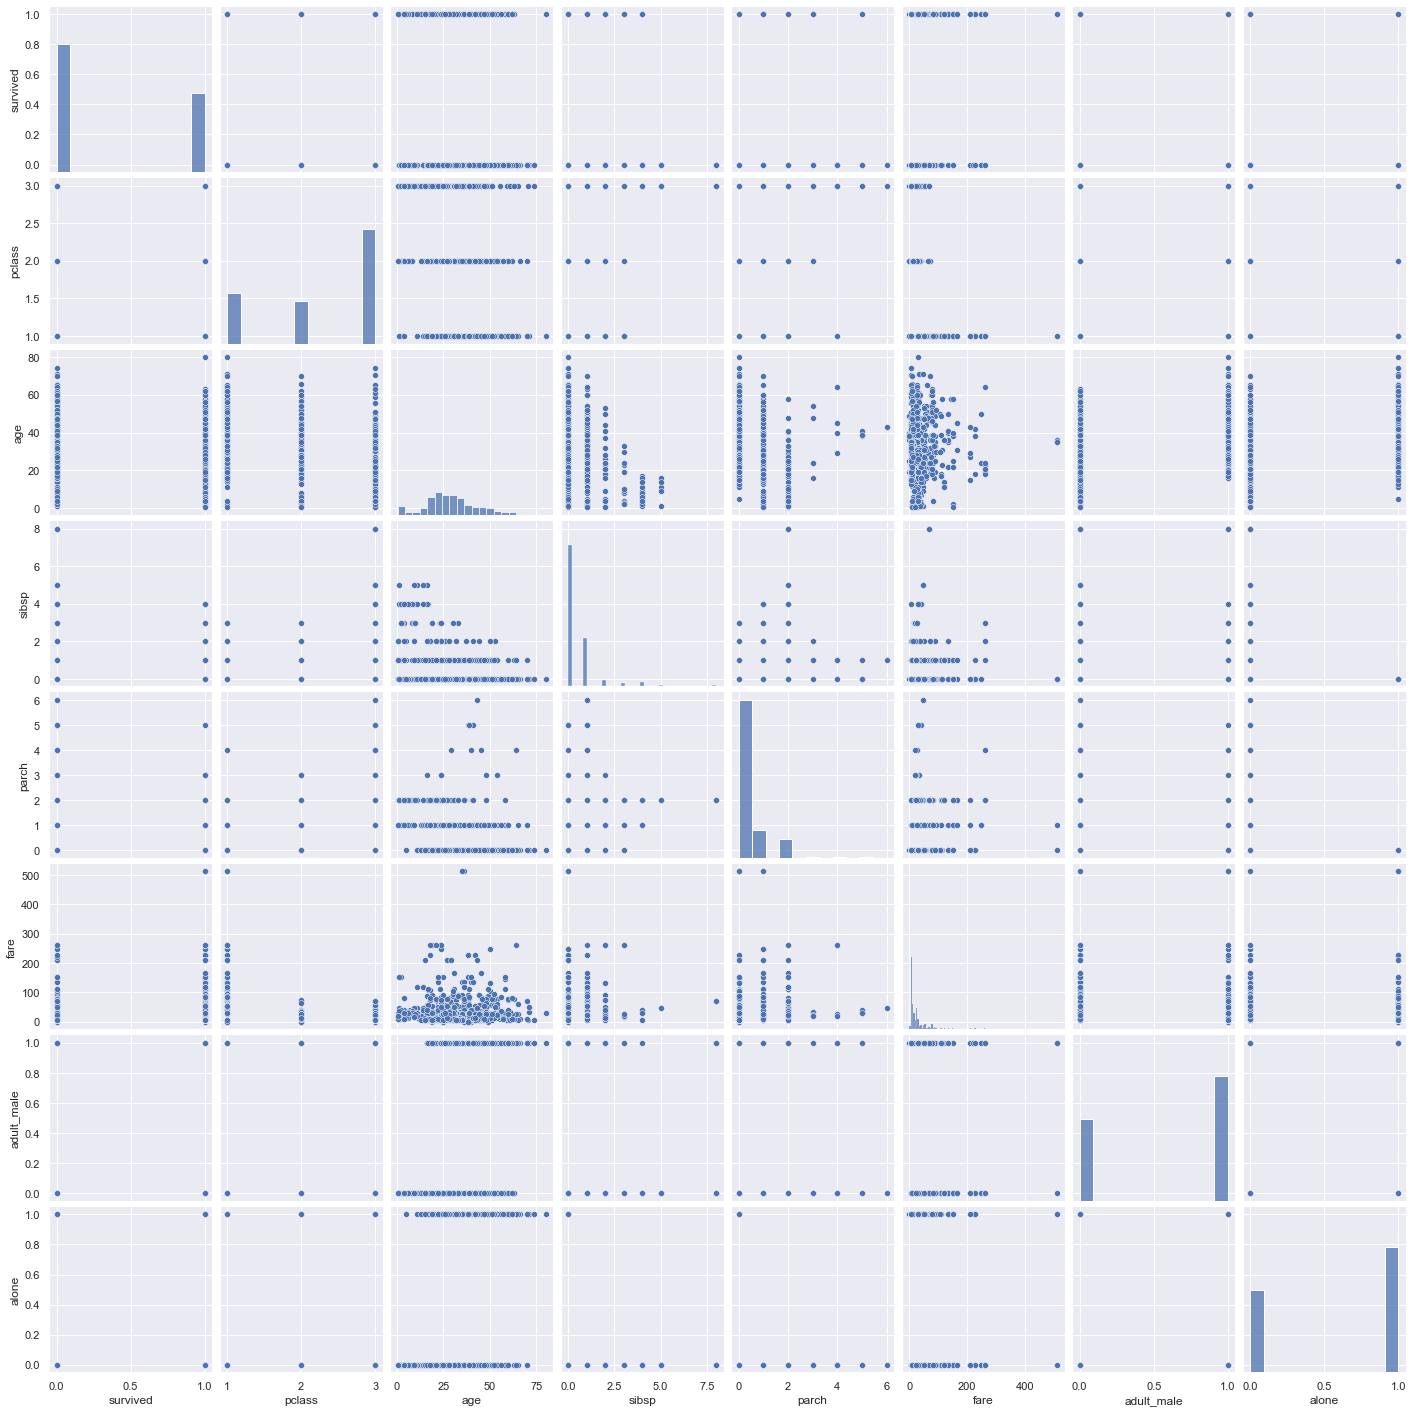

In [201]:
sns.pairplot(titanic)

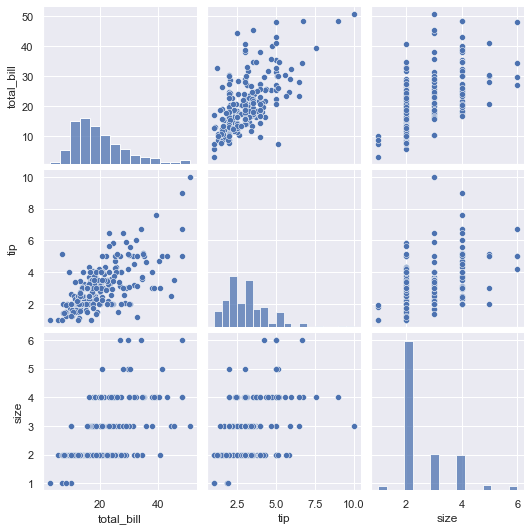

In [202]:
sns.pairplot(tips)

<a name='2-4'></a>
### Plotting Distributions with rugplot()

rugplot() plot marginal distributions by drawing ticks or dash along the x and y axis of the univariate variable.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

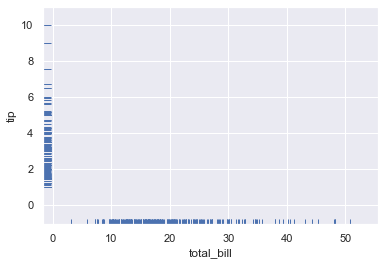

In [203]:
sns.rugplot(data=tips, x='total_bill', y='tip')

Combining `relplot()` and `rugplot` in one figure...

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

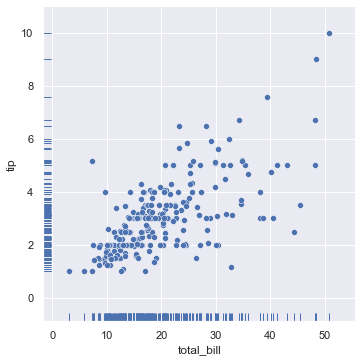

In [204]:
sns.relplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip')

<a name='2-5'></a>
### Kernel Density Estimation (KDE) Plot with kdeplot() and displot()

We can visualize the probability density of a variable. Different to histogram which shows the counts, KDE plot smooths the visualization with a Guassian kernel. 

<AxesSubplot:xlabel='tip', ylabel='Density'>

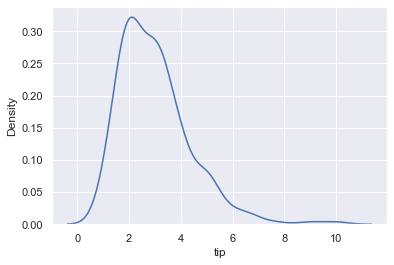

In [205]:
sns.kdeplot(data=tips, x='tip')

<AxesSubplot:xlabel='tip', ylabel='Density'>

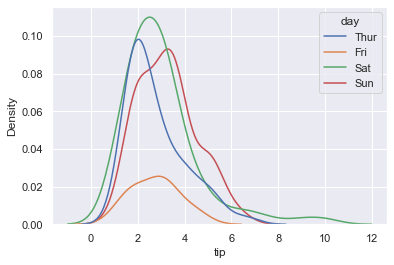

In [206]:
sns.kdeplot(data=tips, x='tip', hue='day')

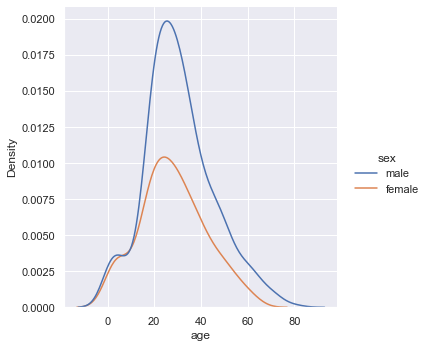

In [207]:
sns.displot(titanic,x='age', kind='kde', hue='sex')

<AxesSubplot:xlabel='tip', ylabel='Density'>

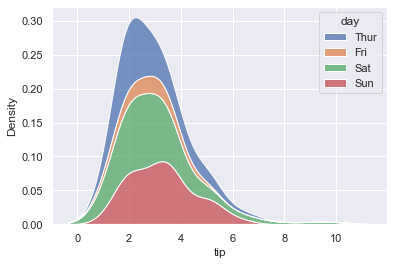

In [208]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

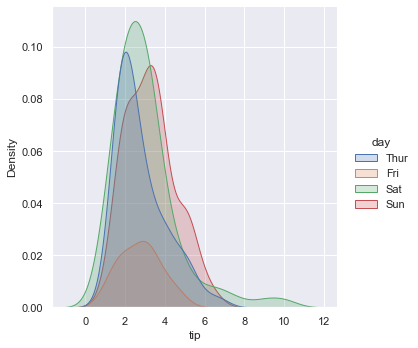

In [209]:
sns.displot(data=tips, x='tip', hue='day', kind='kde', fill=True)

Whether you use `displot()` or `kdeplot()`, you can see they are very handy in visualizing the density distributions. 



<a name='2-6'></a>
### Cumulative Distributions

There are times we would like to visualize the cumulative distributions. By setting kind parameter in displot() to `ecdf`, we can plot the cumulative or increasing curve of an univariate variable. 

`ecdf` stands for `empirical cumulative distribution function`

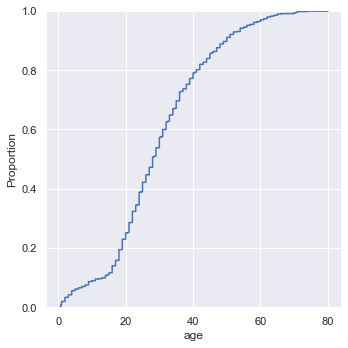

In [210]:
sns.displot(titanic, x='age', kind='ecdf')

<a name='3'></a>
## 3. Categorical Plots

Categorical plots are used to visualize the categorical data. 

In Seaborn, there are various plot functions that we are going to see:

1. Categorical estimate plots

* barplot()
* countplot()
* pointplot()

2. Categorical distribution plots

* boxplot()
* boxenplot()
* violinplot()

3. Categorical scatter plots
* stripplot()
* swarmplot()

Just like we saw in distribution plots, Seaborn also provides a high level function `catplot()` to plot all these types above. You just have to pass the `kind` parameter. In order of what how they are listed above, here is the kind parameter: `bar, count, point, box, boxen, violin, strip, swarm`. 

We will use both the high level function catplot and the specific categorical function along the way.

<a name='3-1'></a>
### Categorical estimate plots

#### Barplot() and Countplot()

Barplot is used to visualize the aggregated categorical data based on different estimation functions (mean being the default. We can either use `barplot()` or `catplot(...,kind='bar)`.

Countplot is used to visualize the number of observations in each category. It's like histogram for categorical data.

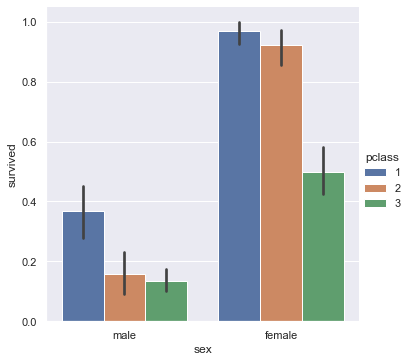

In [211]:
sns.catplot(data=titanic, x='sex', y='survived', hue='pclass', kind='bar')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

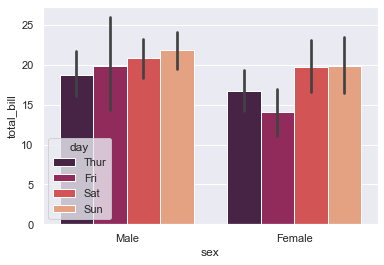

In [212]:
sns.barplot(data=tips, x='sex', y='total_bill', palette='rocket', hue='day')

<AxesSubplot:xlabel='day', ylabel='count'>

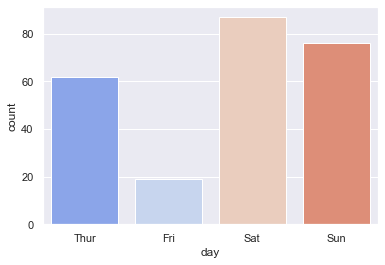

In [213]:
sns.countplot(data=tips, x='day', palette='coolwarm')

#sns.catplot(data=tips, x='day', kind='count', palette='coolwarm') will do the same

#### pointplot()

Rather than plotting bars, pointplot() plots the point estimation of the categorical data. You may also notice that it connects the points with the categorical variable specified at `hue`.

<AxesSubplot:xlabel='sex', ylabel='survived'>

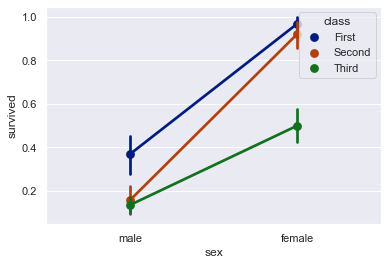

In [214]:
sns.pointplot(data=titanic, x='sex', y='survived', hue='class', palette='dark')

<a name='3-2'></a>
### Categorical distribution plots

#### boxplot() and boxenplot(), violinplot()

Both Box, boxen, and violin plots are used to plot the distributions of the categorical data. 

"A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range." 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

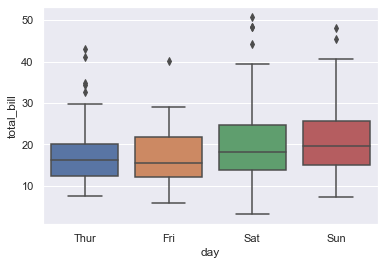

In [215]:
sns.boxplot(data=tips, x='day', y='total_bill')

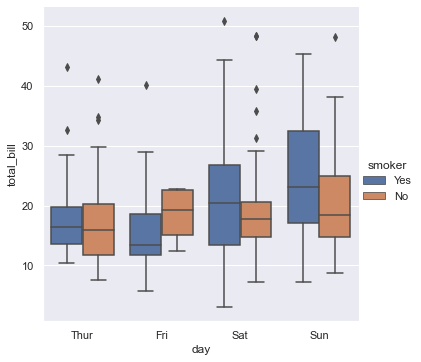

In [216]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='box')

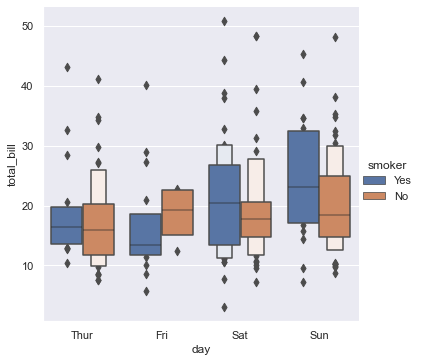

In [217]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='boxen')

Violin plot shows the distributions of the categorical data but features the kernel density of the underlyining estimation. 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

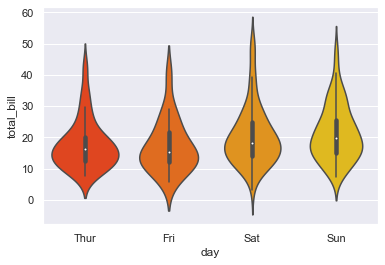

In [218]:
sns.violinplot(data=tips, x='day', y='total_bill', palette='autumn')

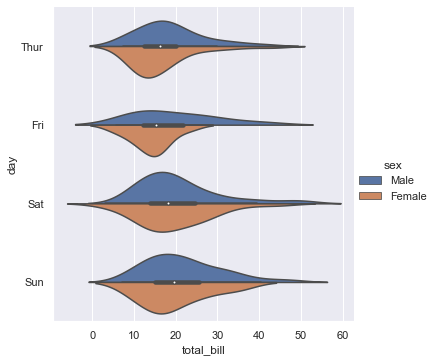

In [219]:
# split parameter save space when hue have two levels

sns.catplot(data=tips, x='total_bill', y='day', 
            hue='sex', kind='violin', split=True)

<a name='3-3'></a>
### Categorical scatter plots

#### stripplot() and swarmplot()

These types of plots make it easy to show the categorical data with scatter plots.

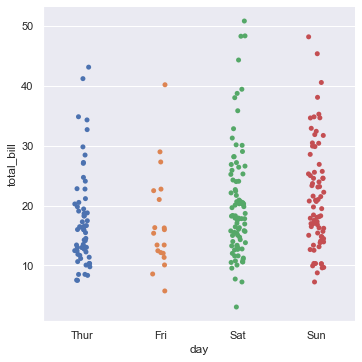

In [220]:
# strip is the default kind paremeter when using catplot()

sns.catplot(data=tips, x='day', y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

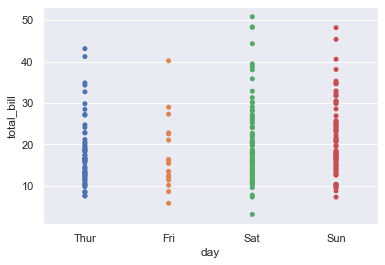

In [221]:
sns.stripplot(data=tips, x='day', y='total_bill', jitter=False)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

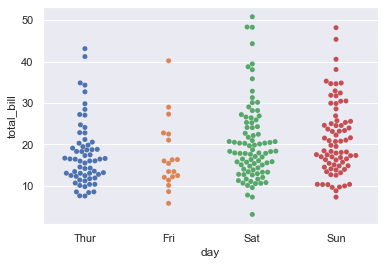

In [222]:
sns.swarmplot(data=tips, x='day', y='total_bill')

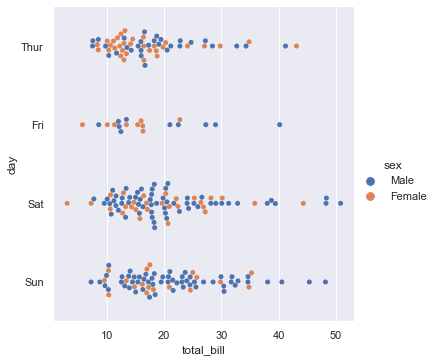

In [223]:
sns.catplot(data=tips, x='total_bill', y='day', hue='sex', kind='swarm')

<a name='3-4'></a>
### Plotting Multiple Categorical plots

Using Facetgrid (Multi-plot grid for plotting conditional relationships), we can plot multiple plots with catplot(....)

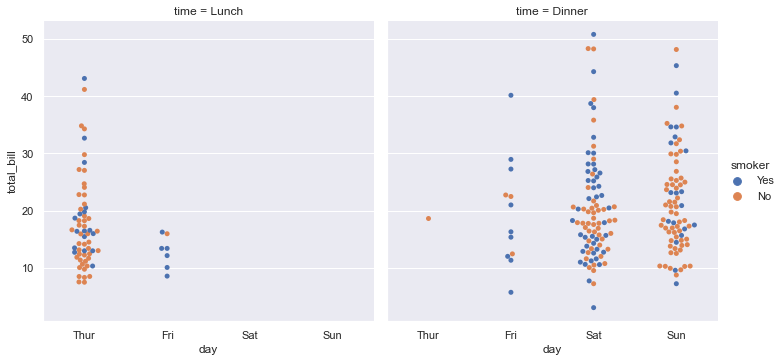

In [224]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker',
            col='time', kind='swarm')

That's it for categorical plots. 

<a name='4'></a>
## 4. Regression Plots

Seaborn takes data visualizations to other extents: Not only you can plot features, but you can also plot the linear relationship between two variables (linear model). 

Even if `regplot()` can be used for such goal, we will use `lmplot()`.



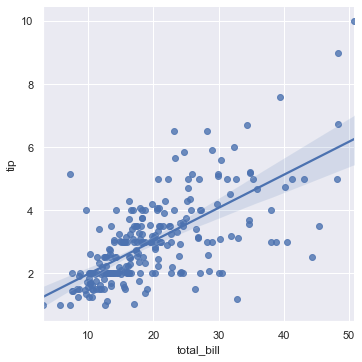

In [225]:
sns.lmplot(data=tips, x='total_bill', y='tip')

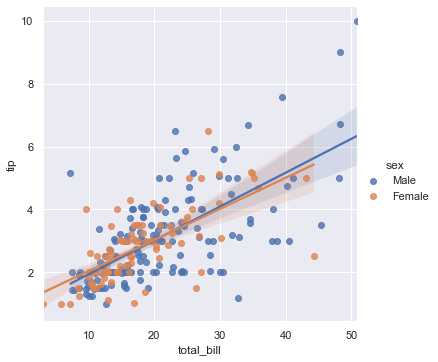

In [226]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex')

In [227]:
tips['big_tip'] = (tips.tip / tips.total_bill) >.15
tips.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


If we have one binary variable, we can also do logistic regression. 

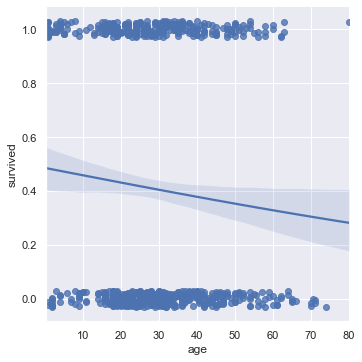

In [228]:
sns.lmplot(x='age', y='survived', data=titanic, logistic=True, y_jitter=0.03)

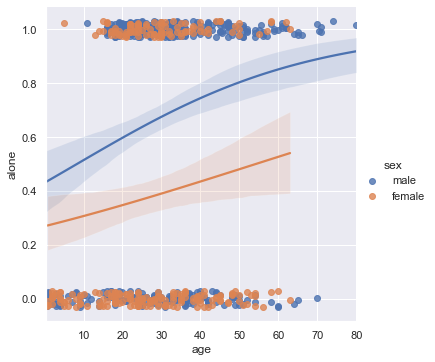

In [229]:
sns.lmplot(x='age', y='alone', data=titanic, logistic=True, y_jitter=0.03, hue='sex')

We can also use markers to make plot more clear

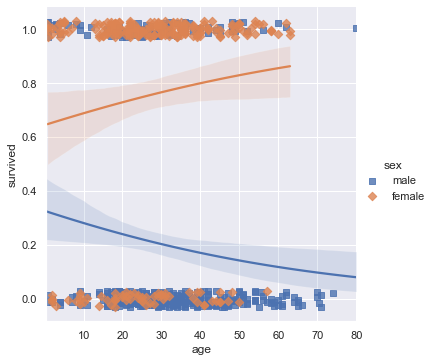

In [230]:
sns.lmplot(x='age', y='survived', data=titanic, hue='sex', logistic=True, 
           y_jitter=0.03, markers=['s','D'])

### Multiple Plots

Like we did before, we can make multiple plots by providing another variable to `col` and `row`.



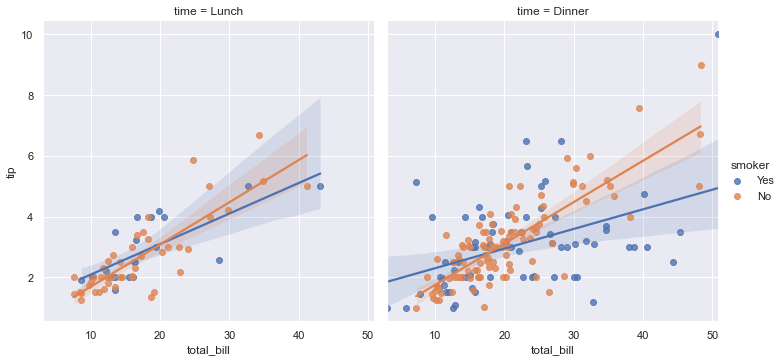

In [231]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time')

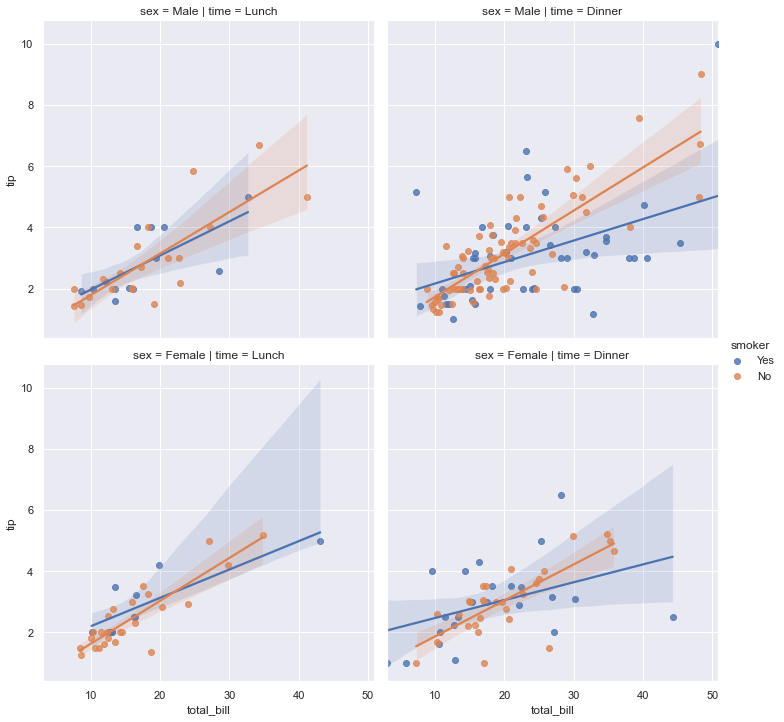

In [232]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time', row='sex')

One last thing about regression plot in Seaborn: We can also use `jointplot()` and `pairplot()` where we use `reg` in parameter `kind`.

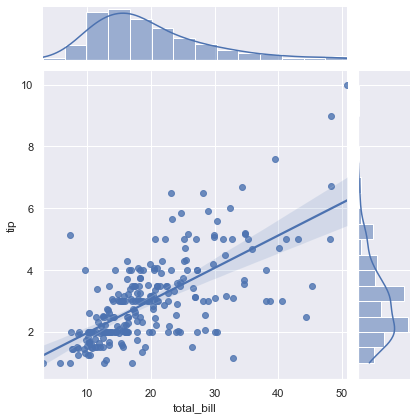

In [233]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

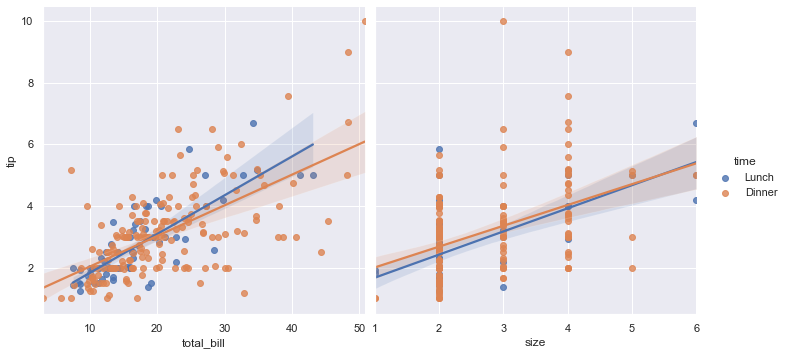

In [234]:
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'],
             hue='time', kind='reg', height=5)

That's it for regression plots!!

<a name='5'></a>
## 5. Multiplots

Multiple plots functions are used to visualize multiple features on multiple axes. 

* Facet Grid
* PairGrid
* Pair Plot

We have already plotted multiple features in previous sections but this section is going to be these grid plots. 

<a name='5-1'></a>
### FacetGrid()

FacetGrid() is used to create multiple grid plots. It allows us to plot the variables on row and column axes, and we can also use `hue` parameter to make the visual more clear based off a given feature. 

What's interesting about FacetGrid is that you can choose whether you plot on row axe, column axe or both. 

sns.FaceGrid() only create grids. In order to add visualizations, we will need to map it to a given plot type (scatter, histogram, bar....). 

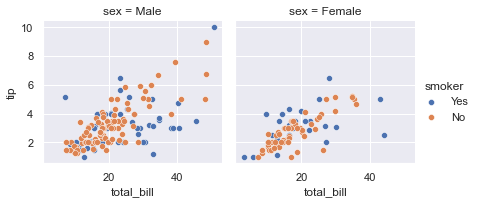

In [235]:
plot = sns.FacetGrid(tips, col='sex', hue='smoker')
plot.map(sns.scatterplot,'total_bill', 'tip')
plot.add_legend()

/Users/jean/opt/miniconda3/envs/tensor/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


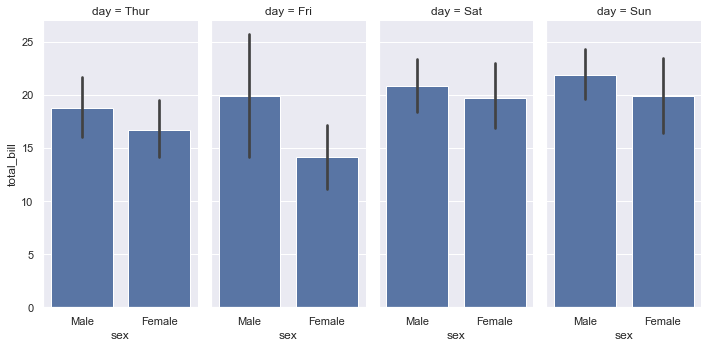

In [236]:
plot = sns.FacetGrid(tips, col='day', height=5, aspect=.5)
plot.map(sns.barplot, 'sex', 'total_bill');

<a name='5-2'></a>
### PairGrid()

We can use pair grid to get the higher level overview of the dataset. It will plot the pairwise relationship in the dataset. 

As you are going to see, it is much easier to use than FacetGrid. 

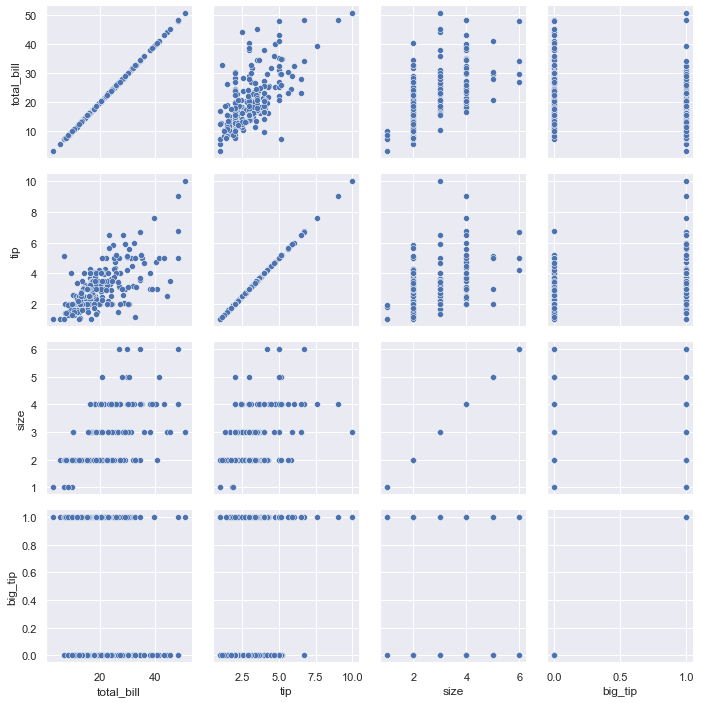

In [237]:
plot = sns.PairGrid(tips)
plot.map(sns.scatterplot)

It is also possible to be selective on the plot type you want at the diagonals. 

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


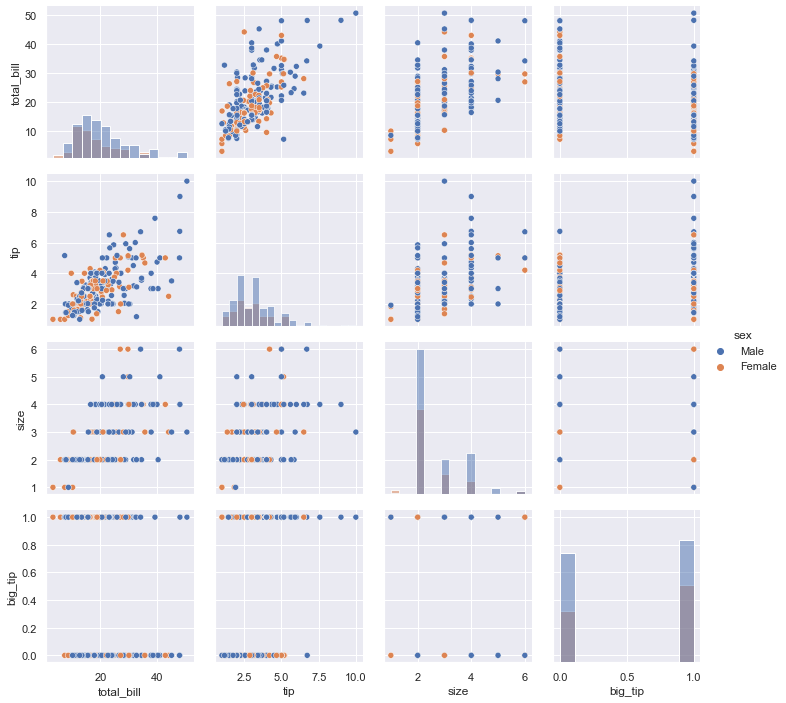

In [238]:
plot = sns.PairGrid(tips, hue='sex')
plot.map_diag(sns.histplot)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


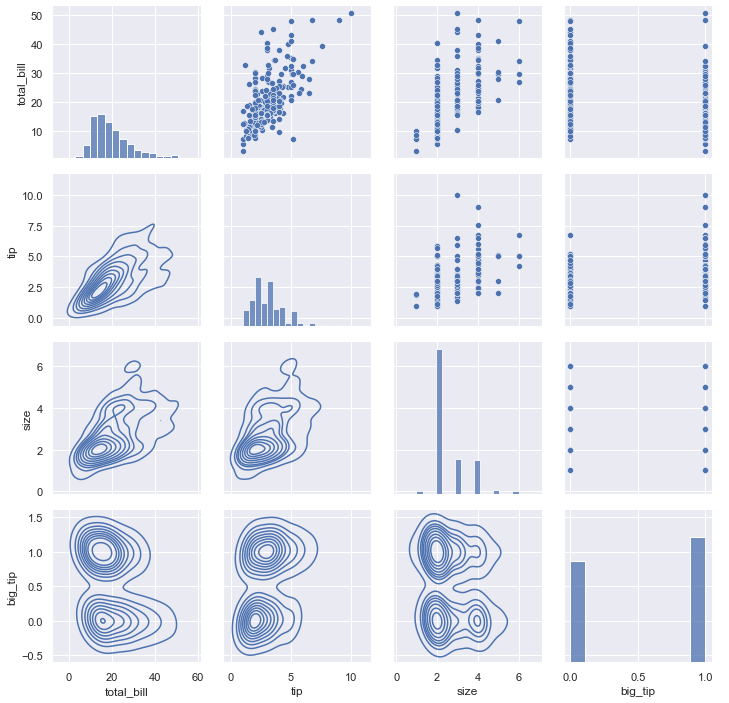

In [239]:
plot = sns.PairGrid(tips)
plot.map_diag(sns.histplot)
plot.map_upper(sns.scatterplot)
plot.map_lower(sns.kdeplot)
plot.add_legend()

If you want, you have the option to select the features you are interested in instead of letting PairGrid plots everything.

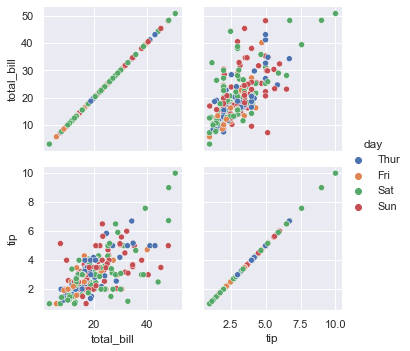

In [240]:
plot = sns.PairGrid(tips, vars=['total_bill', 'tip'], hue='day')
plot.map(sns.scatterplot)
plot.add_legend()

<a name='5-3'></a>
### Pairplot()

Pairplot is a simple, flexible and quick way to visualize the entire dataset. This can allows you to quickly understand the relationships between different features. 

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


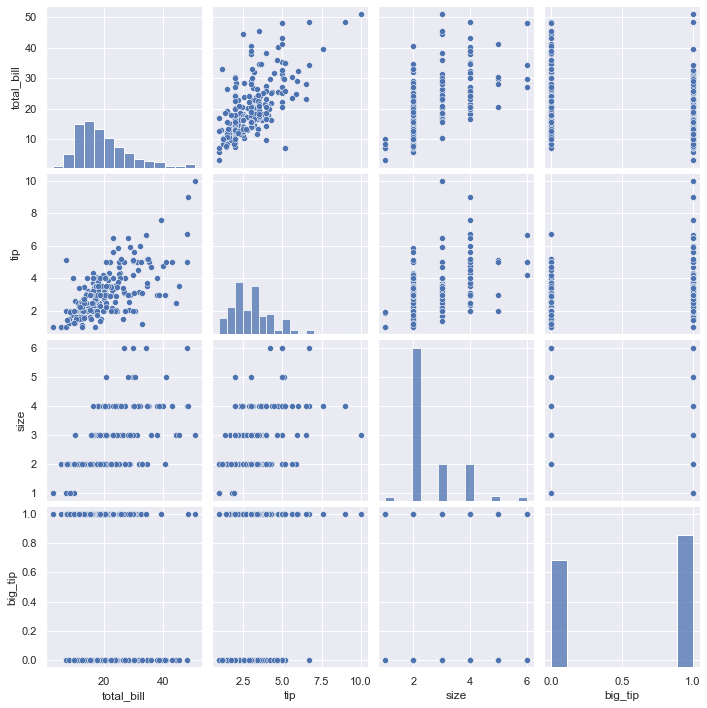

In [241]:
sns.pairplot(tips)

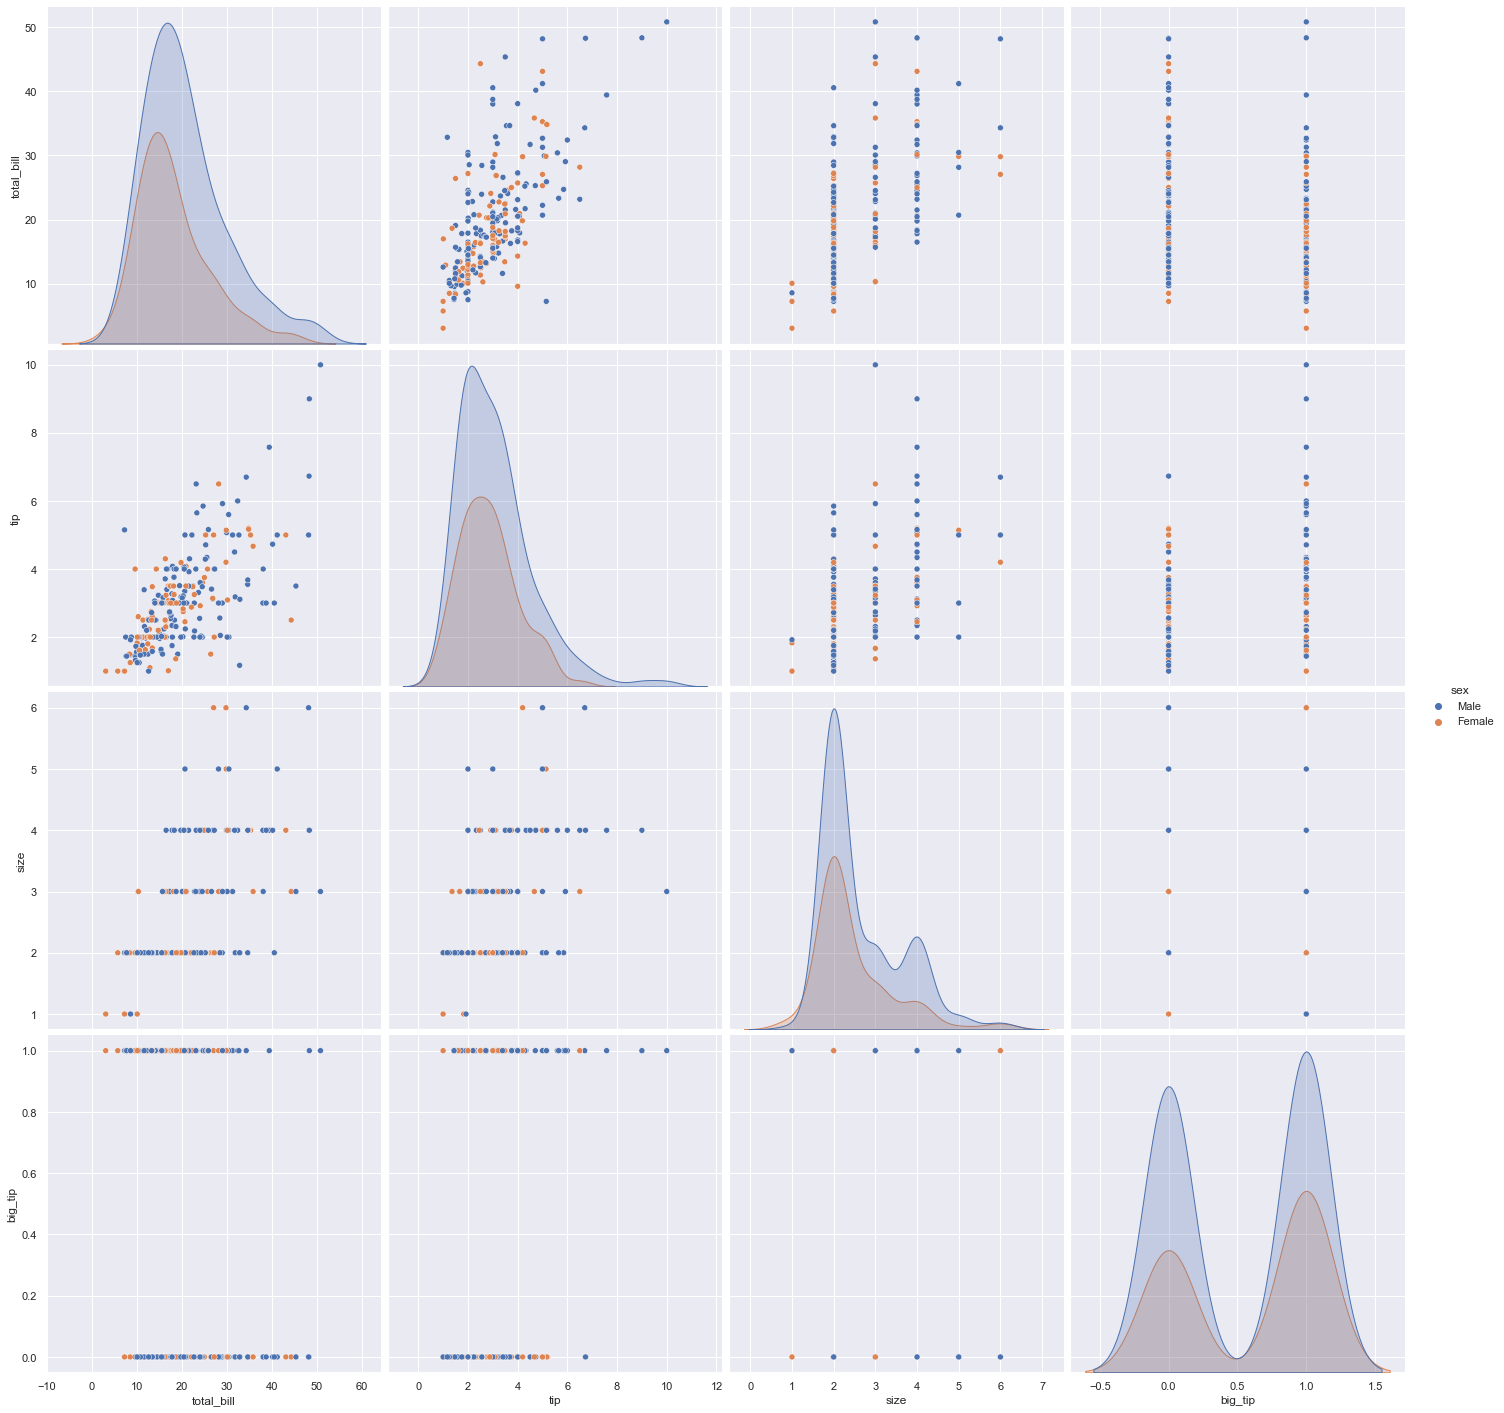

In [242]:
sns.pairplot(tips, hue='sex', height=5);

<a name='6'></a>
## 6. Matrix Plots: Heat Maps and Cluster Maps

In data analysis, sometime it is handy to visualize the data as color encoded matrices and can be used to find the clusters within the data.  

<a name='6-1'></a>
### Heat Maps

heatmap() will color the matrix. 

Let's first see it for a numpy array and we will apply it to a real world dataset.

<AxesSubplot:>

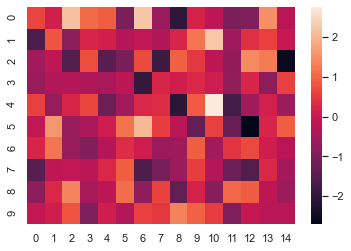

In [243]:
sns.set_theme()
data = np.random.randn(10,15)
sns.heatmap(data)

In [244]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [245]:
# Finding the correlation of features in titanic dataset

correlation = titanic.corr()
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

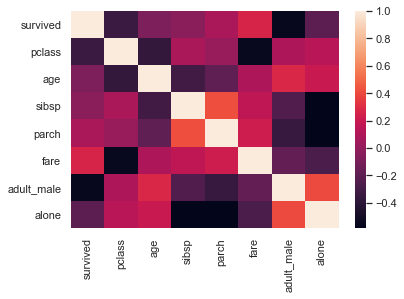

In [246]:
sns.heatmap(correlation)

If you want to add the values in addition to color, you can set the parameter `annot` to `True`.

<AxesSubplot:>

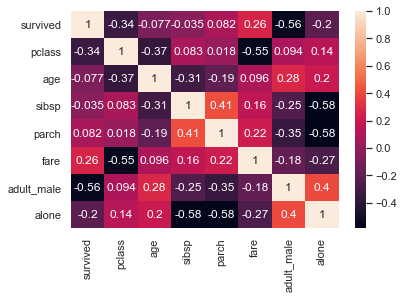

In [247]:
sns.heatmap(correlation, annot=True)

<a name='6-2'></a>
### Cluster Maps

clustermap will plot the clustered heatmap. 

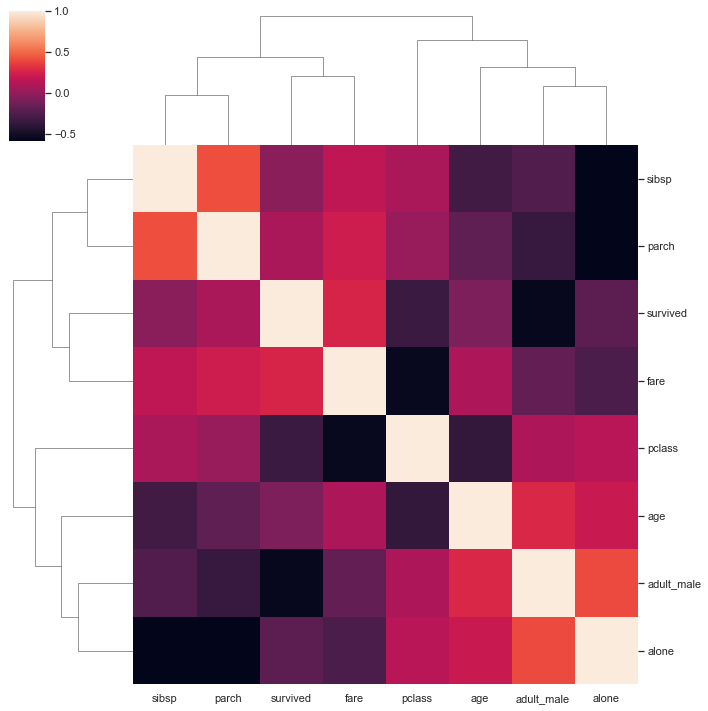

In [248]:
sns.clustermap(correlation)

So far, you have saw how flexible Seaborn is in visualizing data with different kinds of plots. 

By default, the Seaborn plots are clear and good looking. But there are times you are going to need more attractive visualizations and that is what is coming up. 

<a name='7'></a>
## 7. Styles, Themes and Colors

Seaborn allows to customize the visualizations depending on our needs. We may want to have control on the plot styles, colors. Let's see how that works.

<a name='7-1'></a>
### Styles and Themes

There are five styles in Seaborn: `darkgrid(default), whitegrid, dark, white, and ticks.`

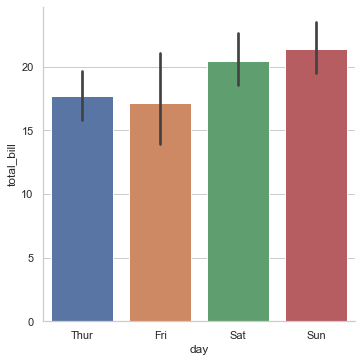

In [249]:
sns.set_style('whitegrid')
sns.catplot(data=tips, x='day', y='total_bill', kind='bar')

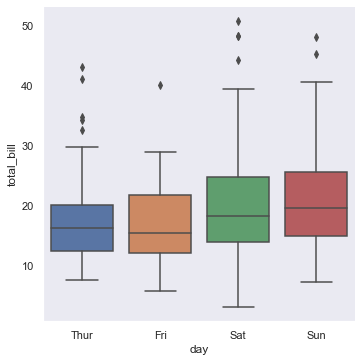

In [250]:
sns.set_style('dark')
sns.catplot(data=tips, x='day', y='total_bill', kind='box')

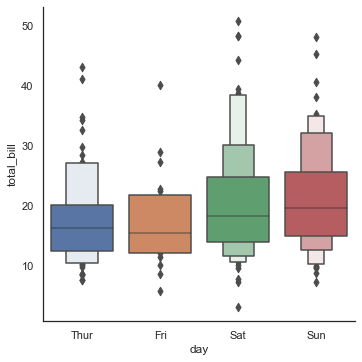

In [251]:
sns.set_style('white')
sns.catplot(data=tips, x='day', y='total_bill', kind='boxen')

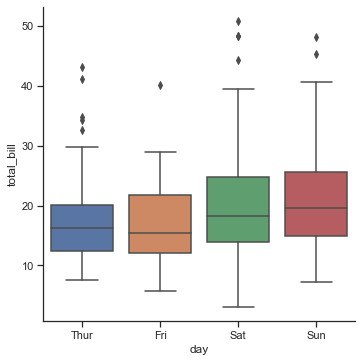

In [252]:
sns.set_style('ticks')
sns.catplot(data=tips, x='day', y='total_bill', kind='box')

#### Removing the Axes Spines

We can also use `despine()` to remove the top and right axes spines.

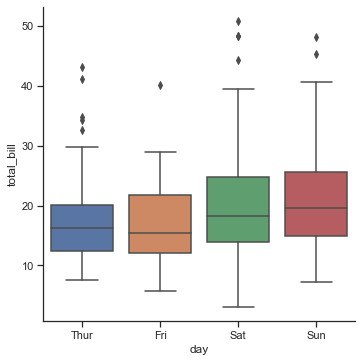

In [253]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box')
sns.despine()

We can also move the spines away from the data by setting the offset distance or points that spines should move away from the axes.

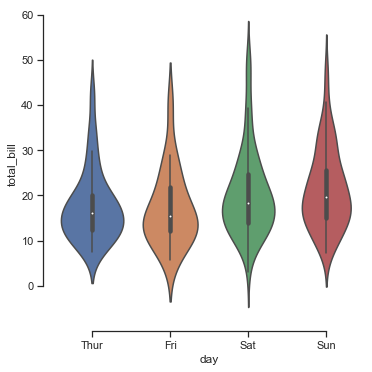

In [254]:
sns.catplot(data=tips, x='day', y='total_bill', kind='violin')
sns.despine(offset=10, trim=True)

#### Size and Aspect

We can use Matplotlib figsize function to change the size of Seaborn plots. 

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

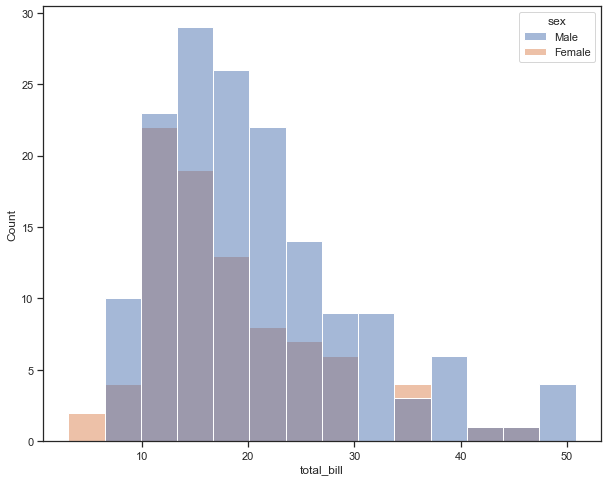

In [255]:
plt.figure(figsize=(10,8))

sns.histplot(data=tips, x='total_bill', hue='sex')

You can also set the size of the plot by using parameters `size and aspect` but they do not work in all plots. 

#### Scaling plot elements with the context

Context is used to control the scale of the elements of the plot. This can be really helpful depending on where you want to use the visualizations. 

We use `sns.set_context()` to achieve that. There are four contexts: `paper, notebook(default), talk, and poster`.

But we also have to reset the style first.

In [256]:
sns.set_theme()

<AxesSubplot:xlabel='tip', ylabel='Density'>

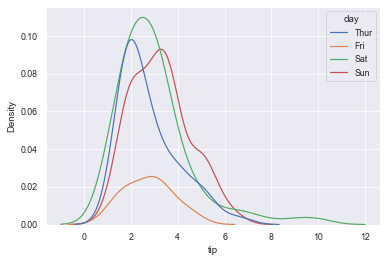

In [257]:
sns.set_context('paper')
sns.kdeplot(data=tips, x='tip', hue='day')

<AxesSubplot:xlabel='tip', ylabel='Density'>

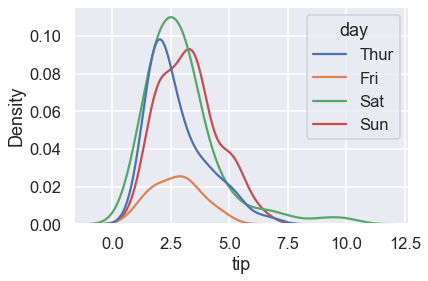

In [258]:
sns.set_context('talk')
sns.kdeplot(data=tips, x='tip', hue='day')

<AxesSubplot:xlabel='tip', ylabel='Density'>

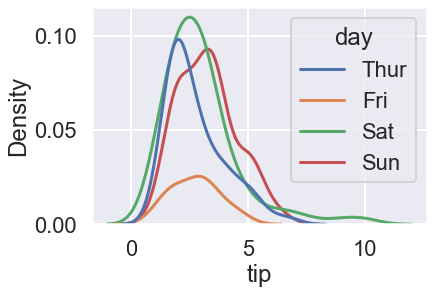

In [259]:
sns.set_context('poster')
sns.kdeplot(data=tips, x='tip', hue='day')

<AxesSubplot:xlabel='tip', ylabel='Density'>

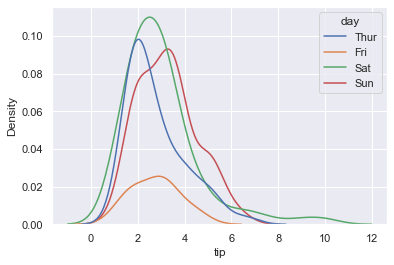

In [260]:
sns.set_context('notebook')
sns.kdeplot(data=tips, x='tip', hue='day')

<a name='7-2'></a>
### Colors

Seaborn allows us to choose color that we think can make the visuals attractive. 

With whole range of color palettes, there are so many options to choose from. 

We can either use `sns.color_palette()` before each plot, or set `palette` inside the plot definition.

<AxesSubplot:xlabel='tip', ylabel='Density'>

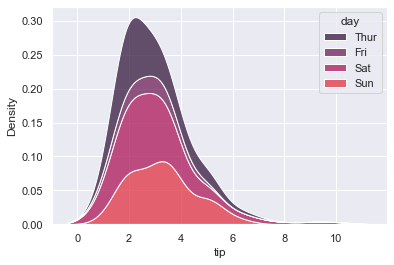

In [261]:
sns.set_palette('rocket')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

<AxesSubplot:xlabel='tip', ylabel='Density'>

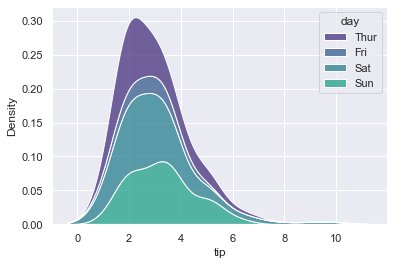

In [262]:
sns.set_palette('viridis')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

<AxesSubplot:xlabel='tip', ylabel='Density'>

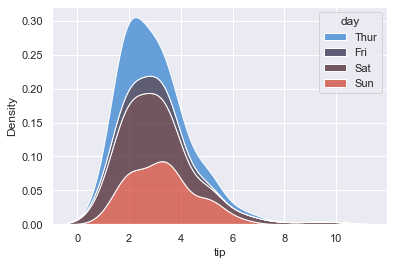

In [263]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack', palette='icefire')

As you can see, it makes the plots more appearing. There so many palettes and here is the list. You can play with them to see what color matches your purpose.

To see the available color palettes, check out the [documentation](https://seaborn.pydata.org/tutorial/color_palettes.html) or this [cheat sheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets-2.png). 

In [264]:
# To see what the palette looks like

sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [265]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

Lastly, you can use `sns.set_theme()` to directly set the style, palette, and context.

<AxesSubplot:xlabel='tip', ylabel='Density'>

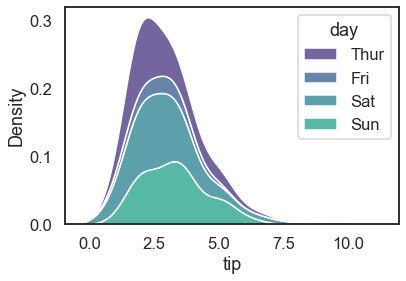

In [266]:
sns.set_theme(style='white', context='talk', palette='viridis')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

#### This is the end of the lab!! 

<a name='0'></a>

[Back to Top](#0)